## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Sanger (generalization of Oja) algorithm

Assume that the objective function is 
$$
E(x,y)=
\left[\begin{array}{l}x-x_0 & y-y_0\end{array}\right]
M
\left[\begin{array}{l}x-x_0 \\ y-y_0\end{array}\right]
$$

where 

$$
\begin{array}{l}
&M =Q \Lambda Q^T \\
&\Lambda = \left[\begin{array}{ll}
\lambda_1 & 0 \\
0 & \lambda_2
\end{array}\right]\\
&Q = \left[\begin{array}{ll}
cos(\theta) & sin(\theta) \\
-sin(\theta) & cos(\theta)
\end{array}\right]\\
\end{array}
$$

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [3]:
x0 = 0
y0 = 0
a = 1
b = 1/4
lambda1 = 1/a ** 2
lambda2 = 1/b ** 2
theta = np.pi / 4
Q = np.array([[np.cos(theta),  np.sin(theta)],
              [-np.sin(theta), np.cos(theta)]])
Lambda = np.array([[lambda1, 0],
                  [0, lambda2]])
M = Q.T @ Lambda @ Q

In [4]:
xs=np.arange(-4,4,0.1)
ys=np.arange(-4,4,0.1)
E = np.ndarray([len(xs),len(ys)])
for i,x in enumerate (xs):
    for j,y in enumerate(ys):
        p = np.array([x,y])
        E[i,j] = p.T @ M @ p
X, Y = np.meshgrid(xs, ys, indexing='ij')

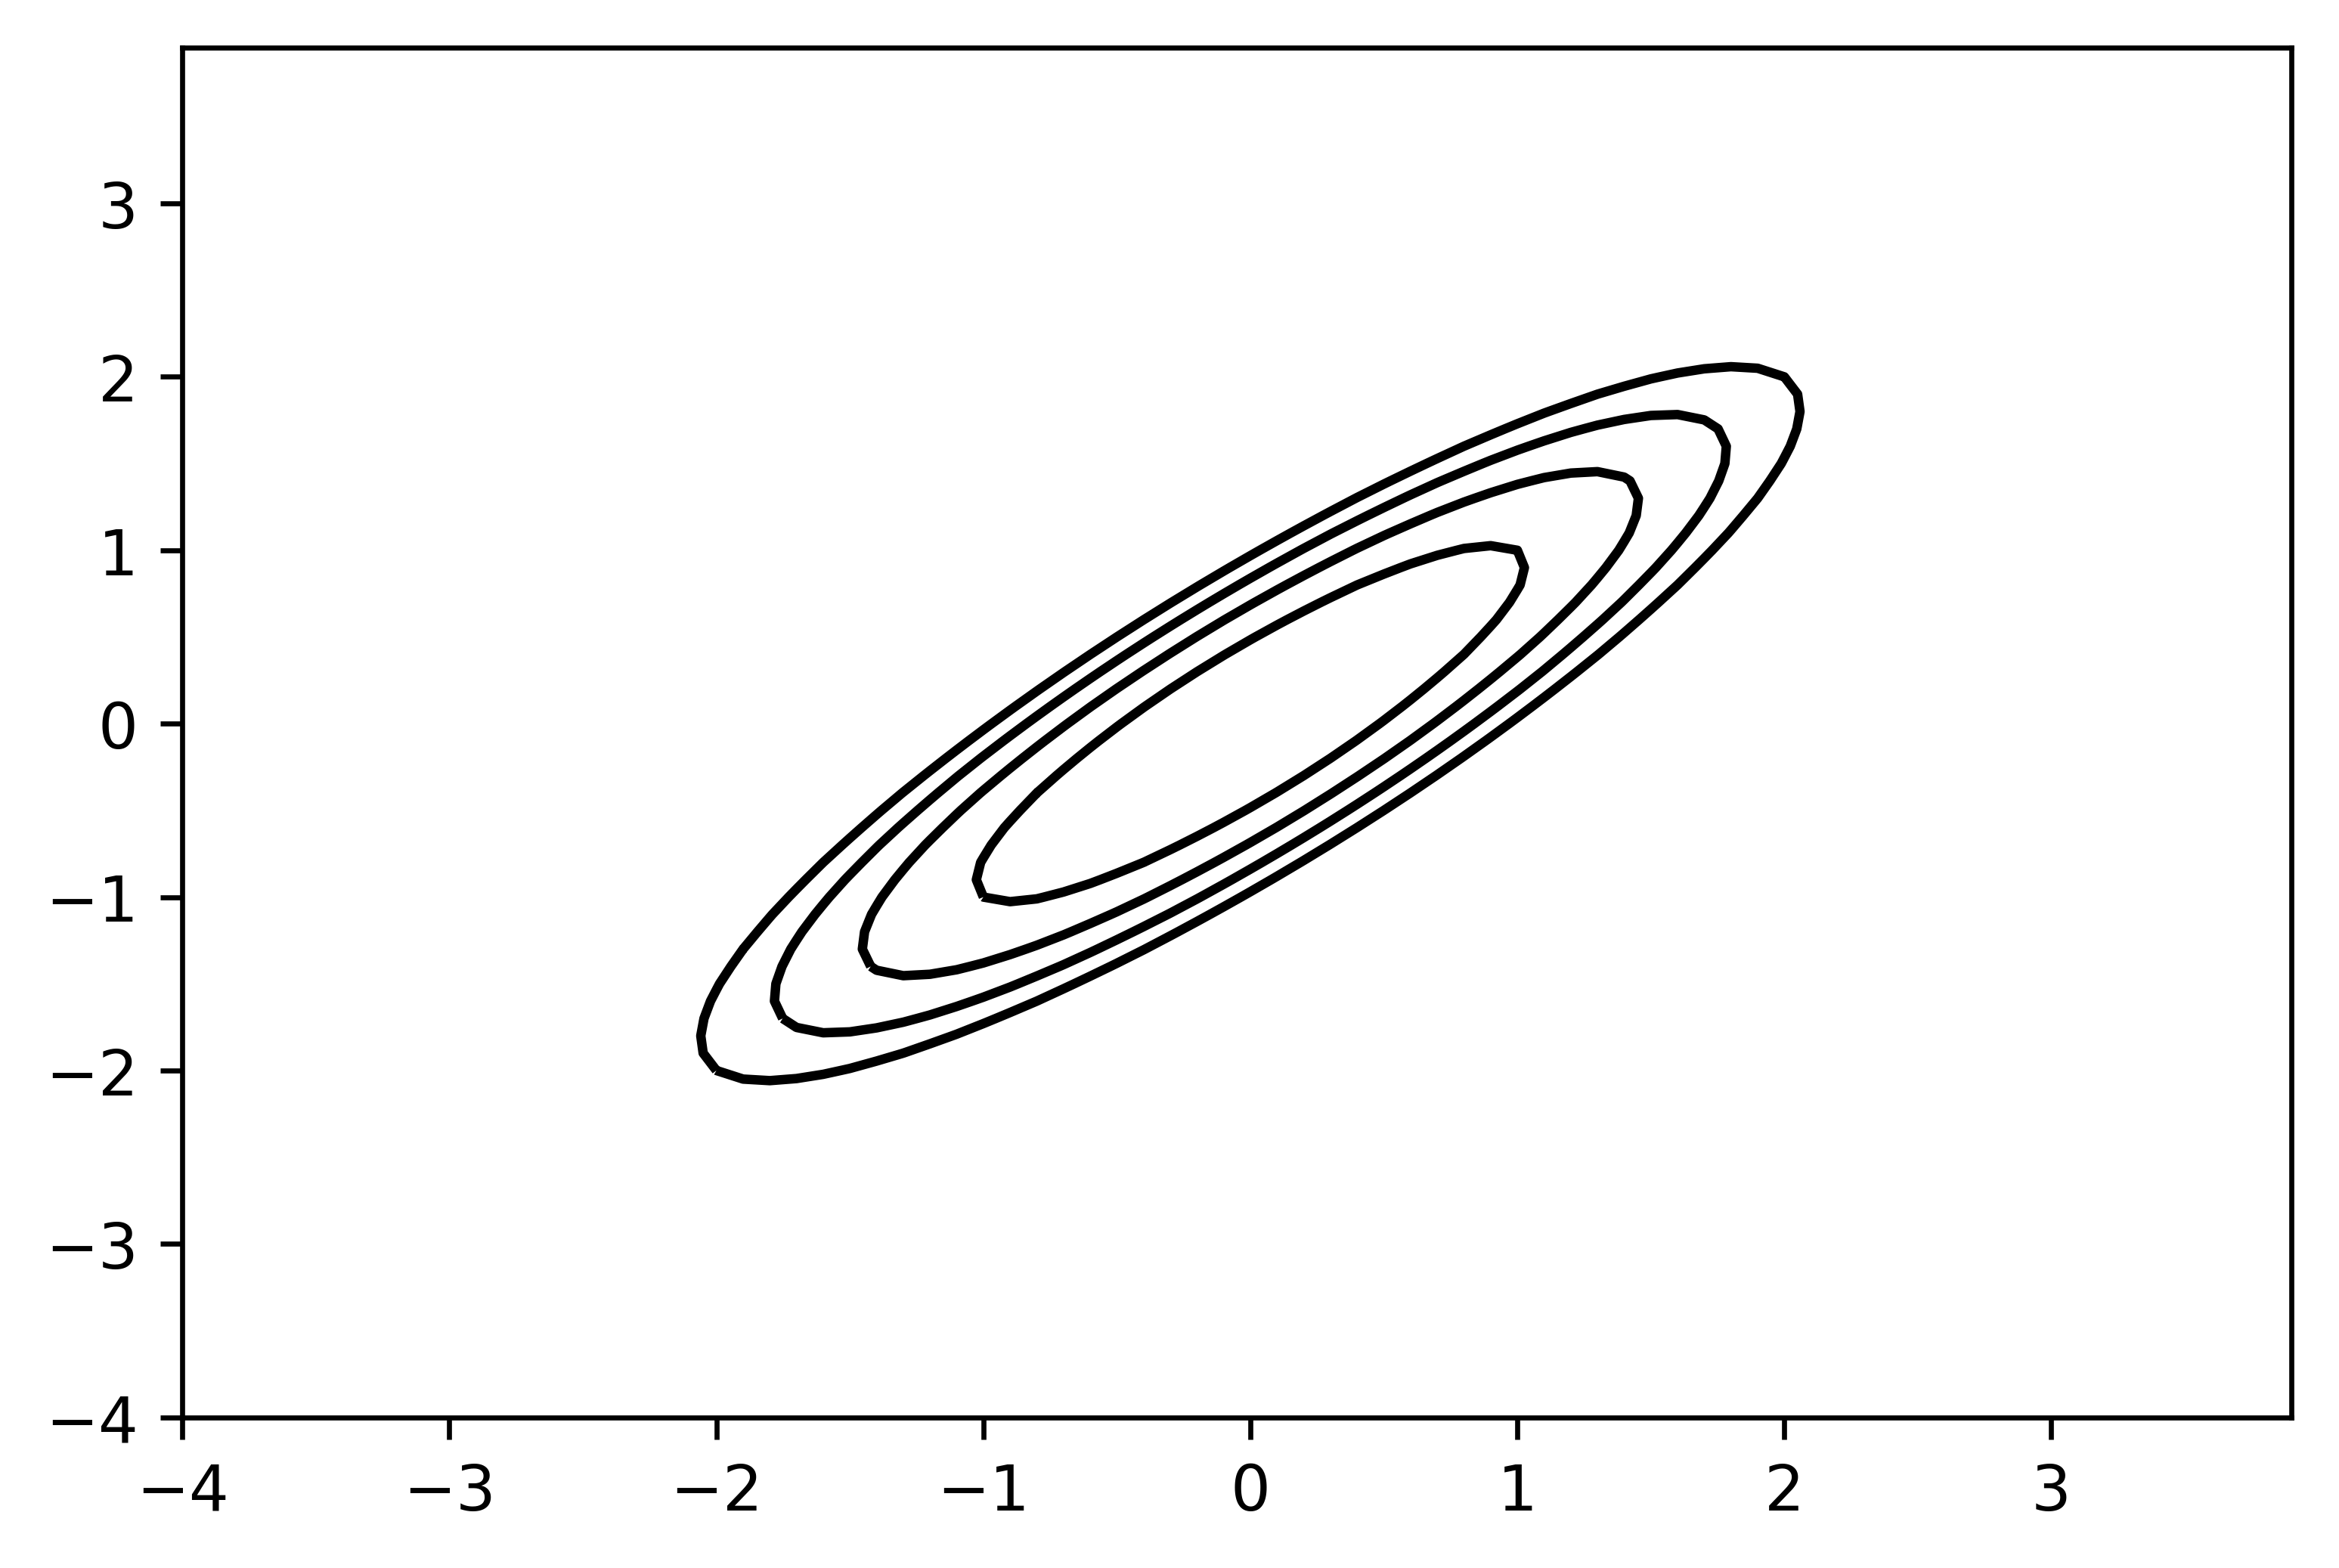

In [5]:
fig = plt.figure()
surf = plt.contour(X, Y, E, np.arange(0,10,2), colors='k')
plt.show()

In [6]:
def sanger(data, out_dim, epochs, sanger_lr, moving_average):
    N, in_dim = data.shape
    W = np.random.rand (out_dim, in_dim)
    for m in range(out_dim):
        W[m,:] = W[m,:] / np.linalg.norm (W[m,:])
    estimated_mean = np.zeros(in_dim)
    for e in range (epochs):
        for n in range (N):
            x = data[n,:]
            estimated_mean *= (1-moving_average)
            estimated_mean += moving_average * x
            x_ = x - estimated_mean
            y = W @ x_
            summation = 0
            for m in range (out_dim):
                summation += y[m] * W[m,:]
                W[m,:] += sanger_lr * y[m] * (x_ - summation)
    return W, estimated_mean

In [7]:
LambdaInv = np.array([[1/lambda1, 0],
                      [0, 1/lambda2]])
Minv = Q.T @ LambdaInv @ Q
data = np.random.multivariate_normal([0,0], Minv, 1000)
W, estimated_mean = sanger(data, 2, 100, 0.01, 0.001)
print (estimated_mean)
print(W[0,:], W[1,:])

[-0.0290649  -0.02188105]
[0.70794709 0.70648257] [ 0.70600624 -0.71033926]


In [8]:
print(np.linalg.norm(W[0,:]), np.linalg.norm(W[1,:]))
print (W[0,:] @ W[1,:])

1.0001533402114555 1.0015121997024492
-0.002027245447779824


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


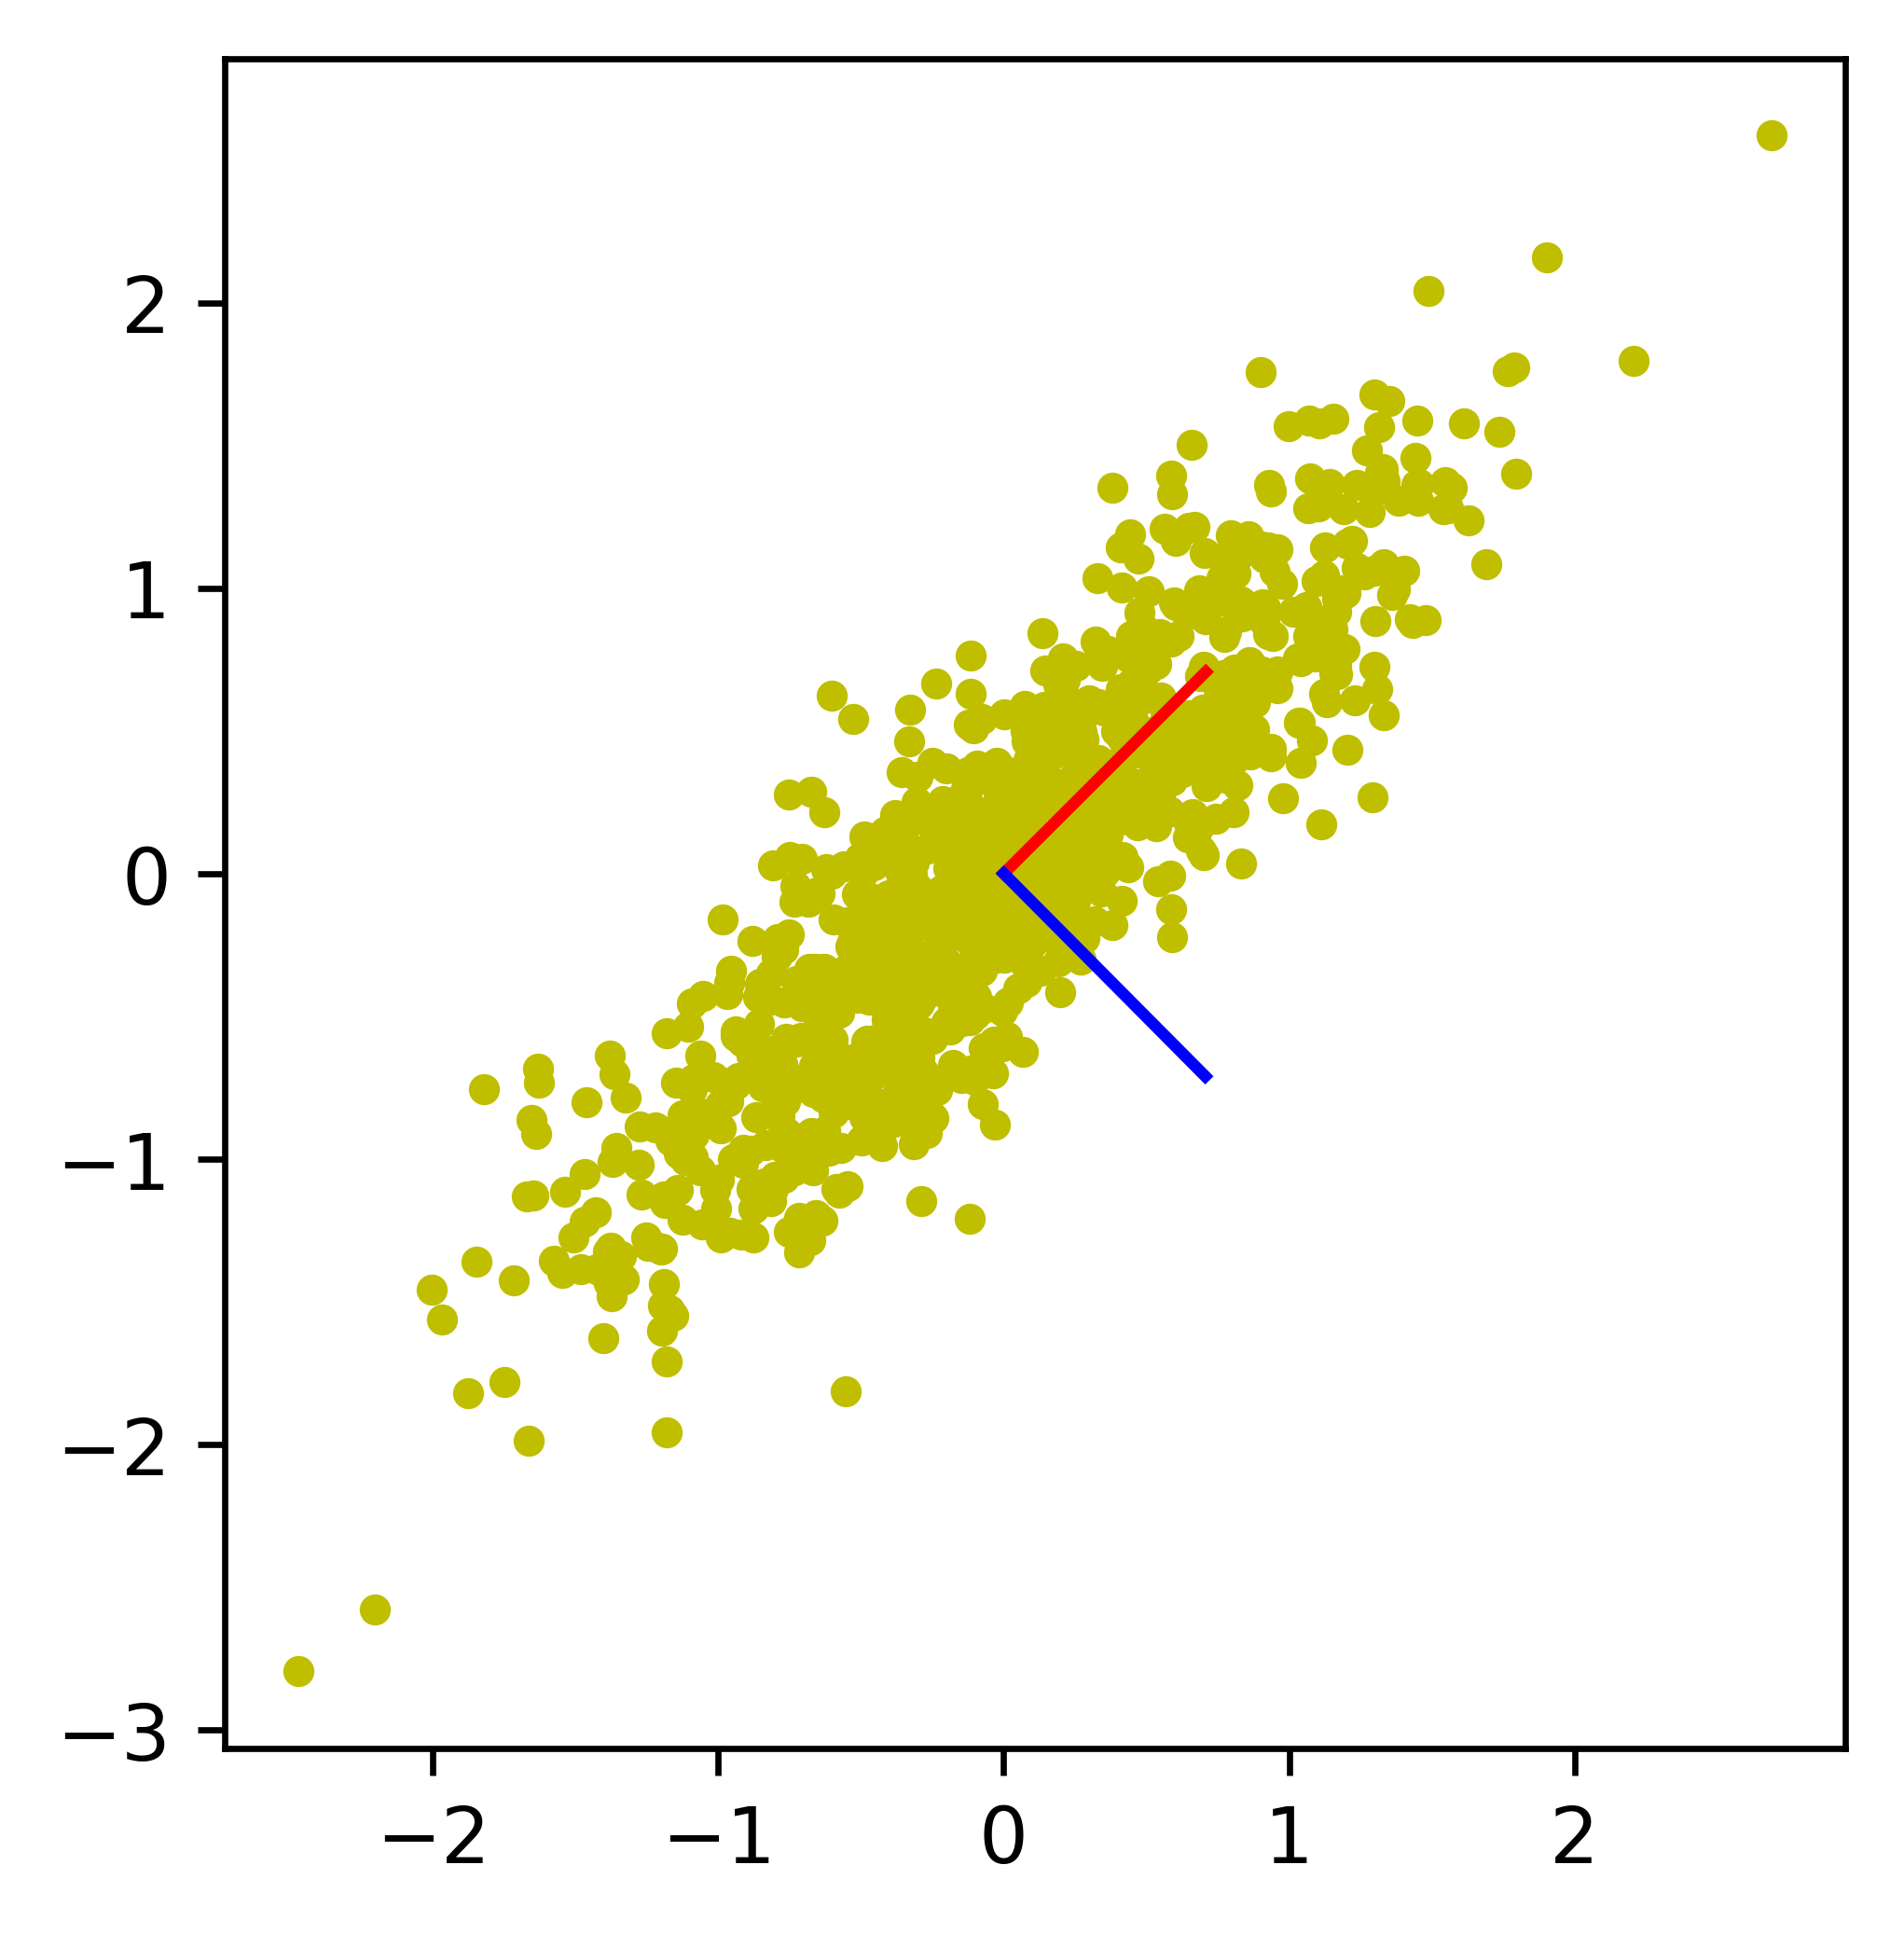

In [9]:
plt.plot (data[:,0], data[:,1], 'y.')
plt.plot ([0,W[0,0]],[0,W[0,1]], 'r')
plt.plot ([0,W[1,0]],[0,W[1,1]], 'b')
ax = plt.axes()
ax.set_aspect(1)
plt.show()